In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import (
    roc_curve, auc, precision_recall_curve, average_precision_score,
    confusion_matrix, classification_report
)
import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully")

Libraries imported successfully


In [13]:
# Load data and models
X_test_scaled = pd.read_csv("../data/X_test_scaled.csv")
y_test = pd.read_csv("../data/y_test.csv").values.ravel()

# Load predictions
y_test_pred_stack = np.load('../data/y_test_pred_stack.npy')
y_test_prob_stack = np.load('../data/y_test_prob_stack.npy')

# Load model
with open('../data/stack_clf.pkl', 'rb') as f:
    stack_clf = pickle.load(f)

print("="*80)
print("FINAL RESULTS & ANALYSIS")
print("="*80)
print(f"\nTest set size: {len(y_test)}")
print(f"Stroke cases in test set: {y_test.sum()}")
print(f"Non-stroke cases in test set: {len(y_test) - y_test.sum()}")

FINAL RESULTS & ANALYSIS

Test set size: 11457
Stroke cases in test set: 1942
Non-stroke cases in test set: 9515


## Performance Metrics

In [14]:
print("\n" + "="*80)
print("DETAILED PERFORMANCE METRICS")
print("="*80)

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred_stack, 
                          target_names=['No Stroke (0)', 'Stroke (1)']))


DETAILED PERFORMANCE METRICS

Classification Report:
               precision    recall  f1-score   support

No Stroke (0)       0.98      0.89      0.94      9515
   Stroke (1)       0.64      0.92      0.76      1942

     accuracy                           0.90     11457
    macro avg       0.81      0.91      0.85     11457
 weighted avg       0.92      0.90      0.91     11457



## ROC Curve

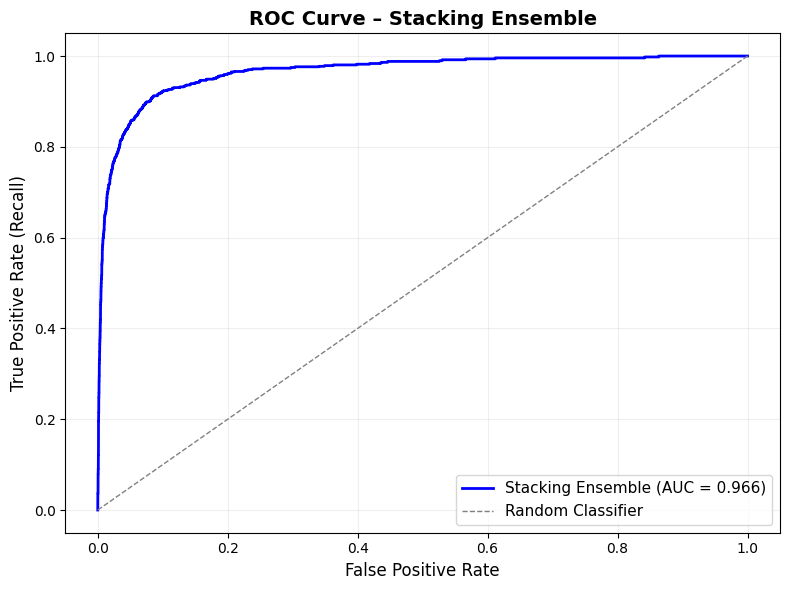

ROC-AUC Score: 0.9656


In [15]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob_stack)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f"Stacking Ensemble (AUC = {roc_auc:.3f})")
plt.plot([0, 1], [0, 1], color="gray", lw=1, linestyle="--", label="Random Classifier")
plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate (Recall)", fontsize=12)
plt.title("ROC Curve – Stacking Ensemble", fontsize=14, fontweight='bold')
plt.legend(loc="lower right", fontsize=11)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('../outputs/roc_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"ROC-AUC Score: {roc_auc:.4f}")

## Precision-Recall Curve

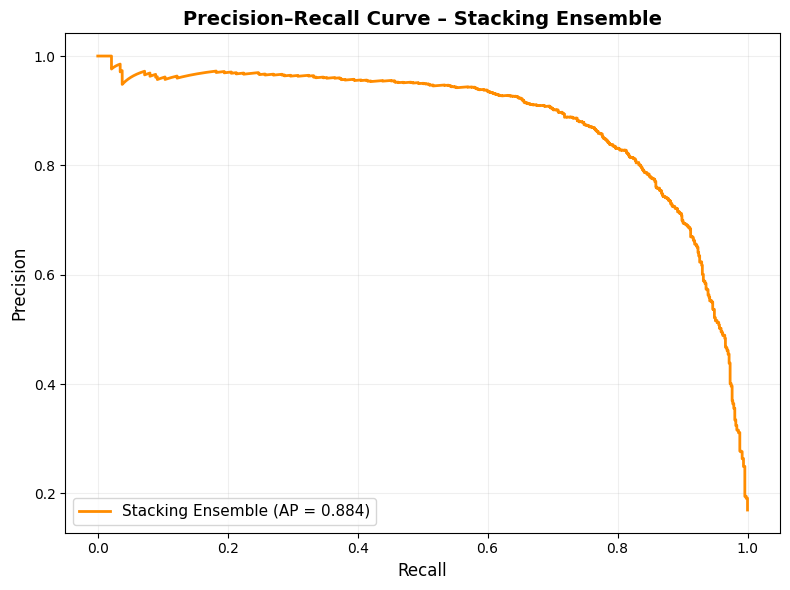

Average Precision Score: 0.8839


In [16]:
# Precision Recall Curve
precision, recall, pr_thresholds = precision_recall_curve(y_test, y_test_prob_stack)
ap = average_precision_score(y_test, y_test_prob_stack)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color="darkorange", lw=2,
         label=f"Stacking Ensemble (AP = {ap:.3f})")
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("Precision–Recall Curve – Stacking Ensemble", fontsize=14, fontweight='bold')
plt.legend(loc="lower left", fontsize=11)
plt.grid(alpha=0.2)
plt.tight_layout()
plt.savefig('../outputs/pr_curve.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Average Precision Score: {ap:.4f}")

## Confusion Matrix


CONFUSION MATRIX


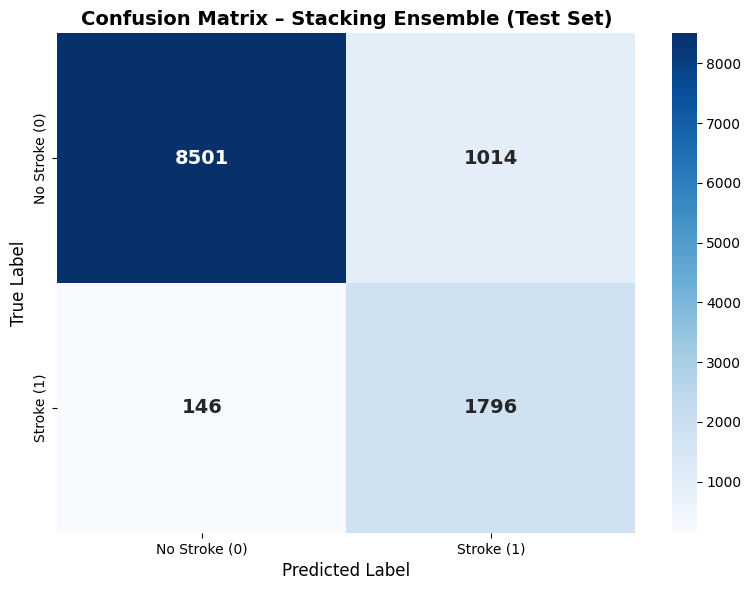


True Negatives (TN):  8501
False Positives (FP): 1014
False Negatives (FN): 146
True Positives (TP):  1796

Sensitivity (Recall): 0.9248
Specificity: 0.8934


In [17]:
# Confusion Matrix
cm_stack = confusion_matrix(y_test, y_test_pred_stack)

print("\n" + "="*80)
print("CONFUSION MATRIX")
print("="*80)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_stack,
            annot=True, fmt='d', cmap='Blues', cbar=True,
            xticklabels=['No Stroke (0)', 'Stroke (1)'],
            yticklabels=['No Stroke (0)', 'Stroke (1)'],
            annot_kws={'size': 14, 'fontweight': 'bold'})
plt.title('Confusion Matrix – Stacking Ensemble (Test Set)', fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('../outputs/confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# Detailed analysis
tn, fp, fn, tp = cm_stack.ravel()
print(f"\nTrue Negatives (TN):  {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP):  {tp}")

# Calculate metrics
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
print(f"\nSensitivity (Recall): {sensitivity:.4f}")
print(f"Specificity: {specificity:.4f}")

## Predictions Distribution

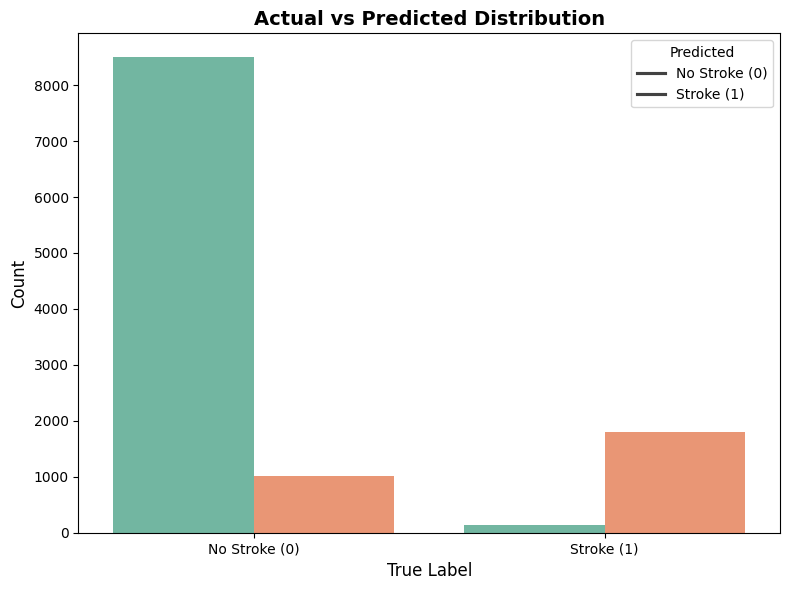

In [18]:
# Actual vs Predicted comparison
comp_df = pd.DataFrame({
    "true": y_test,
    "pred": y_test_pred_stack
})

counts = comp_df.value_counts().reset_index(name="count")

plt.figure(figsize=(8, 6))
sns.barplot(
    data=counts,
    x="true",
    y="count",
    hue="pred",
    palette="Set2"
)
plt.xlabel("True Label", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.title("Actual vs Predicted Distribution", fontsize=14, fontweight='bold')
plt.xticks([0, 1], ["No Stroke (0)", "Stroke (1)"])
plt.legend(title="Predicted", labels=["No Stroke (0)", "Stroke (1)"])
plt.tight_layout()
plt.savefig('../outputs/actual_vs_predicted.png', dpi=300, bbox_inches='tight')
plt.show()

## Save Results

In [19]:
# Save predictions to CSV
results_df = pd.DataFrame({
    "y_test_true": y_test,
    "y_test_pred_stack": y_test_pred_stack,
    "y_test_prob_stack": y_test_prob_stack
})

results_df.to_csv("../outputs/stacking_test_results.csv", index=False)
print("Results saved to stacking_test_results.csv")
print(f"\nFirst 10 predictions:")
print(results_df.head(10))

Results saved to stacking_test_results.csv

First 10 predictions:
   y_test_true  y_test_pred_stack  y_test_prob_stack
0            0                  0           0.310917
1            0                  0           0.244501
2            1                  1           0.893121
3            0                  0           0.052764
4            0                  0           0.050512
5            0                  0           0.063893
6            0                  0           0.012527
7            0                  0           0.065693
8            0                  0           0.403660
9            0                  0           0.010954


## FINAL SUMMARY
======================

 SELECTED MODEL: Meta Model built by Stacking RF and GB

 Rationale:

- The model is highly sensitive (92%), meaning it catches most stroke cases.
- Specificity (89%) is also strong, so it correctly identifies most non-stroke cases.
- The model is excellent at detecting strokes (low FN), which is critical in healthcare, but it does generate a fair number of false alarms (FP). 
  This trade-off is common in medical prediction systems, where recall is prioritized to avoid missing true cases.


